In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
# reading the data set
df = pd.read_excel("input/palmer_penguins.xlsx")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
# remove rows containing NaN
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(344, 8)
(333, 8)


In [4]:
# recode feature values
df["sex_recoded"] = df.sex.map({"male":1, "female":2})
df["species_recoded"] = df.species.map({"Adelie":1, "Gentoo":2, "Chinstrap":3}).values

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,sex_recoded,species_recoded
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,2,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,2,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,2,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1,1


In [5]:
# split the data into Predictor (X) and Target (y) variables
X = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "sex_recoded"]].values
y = df.species_recoded.values
print(X)
print(y)

[[3.910e+01 1.870e+01 1.810e+02 3.750e+03 1.000e+00]
 [3.950e+01 1.740e+01 1.860e+02 3.800e+03 2.000e+00]
 [4.030e+01 1.800e+01 1.950e+02 3.250e+03 2.000e+00]
 ...
 [4.960e+01 1.820e+01 1.930e+02 3.775e+03 1.000e+00]
 [5.080e+01 1.900e+01 2.100e+02 4.100e+03 1.000e+00]
 [5.020e+01 1.870e+01 1.980e+02 3.775e+03 2.000e+00]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [6]:
# performing Lasso for feature selection
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

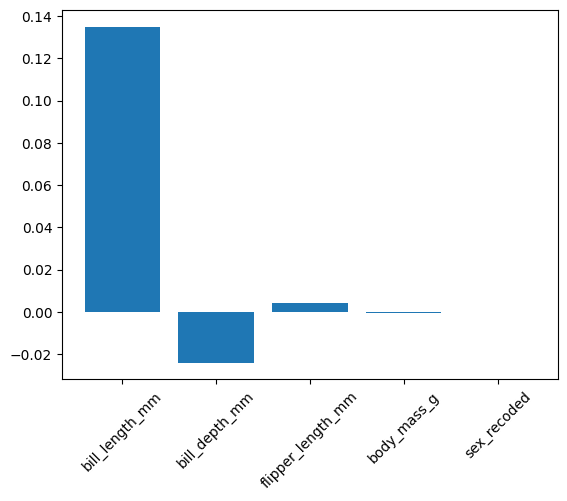

In [7]:
# plot the coef of features
names = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "sex_recoded"]].columns
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()